In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [17]:
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster)) + 1)
    (hist, _) = np.histogram(cluster, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

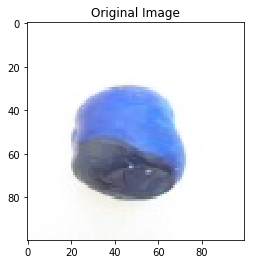

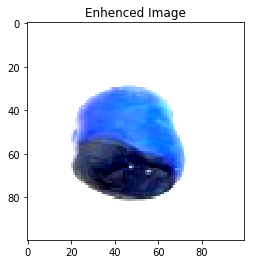

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


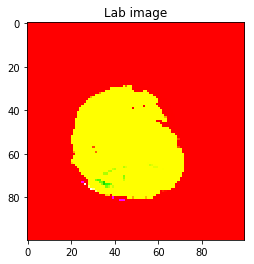

[ 17.971329  11.769589 -26.99445 ] 9.27%
[ 54.819225  22.340914 -67.698044] 11.27%
[99.61609    -0.1068421  -0.38779876] 79.46%


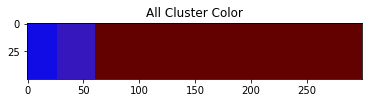

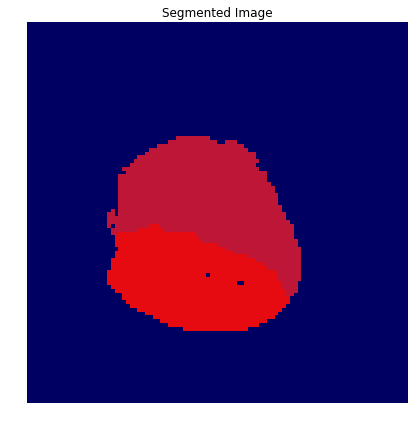

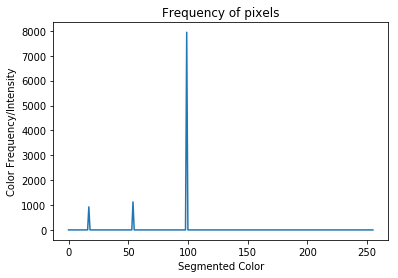

In [19]:

# from skimage import data, segmentation, color
# from skimage.future import graph

# from skimage import io
# from skimage import exposure
# import os
# from sklearn.decomposition import PCA 




# def BGR_TO_HSI(img):
# 	with np.errstate(divide='ignore', invalid='ignore'):
# 		bgr = np.int32(cv2.split(img))
# 		blue = bgr[0]
# 		green = bgr[1]
# 		red = bgr[2]
# 		intensity = np.divide(blue + green + red, 3)
# 		minimum = np.minimum(np.minimum(red, green), blue)
# 		saturation = 1 - 3 * np.divide(minimum, red + green + blue)
# 		sqrt_calc = np.sqrt(((red - green) * (red - green)) + ((red - blue) * (green - blue)))
# 		if (green >= blue).any():
# 			hue = np.arccos((1/2 * ((red-green) + (red - blue)) / sqrt_calc))
# 		else:
# 			hue = 2*pi - np.arccos((1/2 * ((red-green) + (red - blue)) / sqrt_calc))
# 		hue = hue*180/pi
# 		hsi = cv2.merge((hue, saturation, intensity))
# 		return hsi

# def HSI2BGR(hsi_img):
#     hsi=hsi_img.copy()
#     H,S,I=cv2.split(hsi)
#     bgr_img=hsi_img.copy()
#     B,G,R=cv2.split(bgr_img)
#     h,w=B.shape
#     for i in range(h):
#         for j in range(w):            
#             if S[i,j]<1e-6:
#                 R[i,j]=I[i,j]
#                 G[i,j]=I[i,j]
#                 B[i,j]=I[i,j]
#             else:
#                 H[i,j]*=360          
#                 if H[i,j]>0 and H[i,j]<=120:
#                     B[i,j]=(1-S[i,j])*I[i,j]
#                     sigma=(H[i,j]-60)*np.pi/180
#                     temp=np.tan(sigma)/np.sqrt(3)
#                     G[i,j]=(1.5+1.5*temp)*I[i,j]-(0.5+1.5*temp)*B[i,j]
#                     R[i,j]=3*I[i,j]-G[i,j]-B[i,j]
#                 elif H[i,j]>120 and H[i,j]<=240:
#                     R[i,j]=(1-S[i,j])*I[i,j]
#                     sigma=(H[i,j]-180)*np.pi/180
#                     temp=np.tan(sigma)/np.sqrt(3)
#                     B[i,j]=(1.5+1.5*temp)*I[i,j]-(0.5+1.5*temp)*R[i,j]
#                     G[i,j]=3*I[i,j]-R[i,j]-B[i,j]
#                 elif H[i,j]>240 and H[i,j]<=360:
#                     G[i,j]=(1-S[i,j])*I[i,j]
#                     sigma=(H[i,j]-300)*np.pi/180
#                     temp=np.tan(sigma)/np.sqrt(3)
#                     R[i,j]=(1.5+1.5*temp)*I[i,j]-(0.5+1.5*temp)*G[i,j]
#                     B[i,j]=3*I[i,j]-G[i,j]-R[i,j]
#     bgr_img[:,:,0]=B
#     bgr_img[:,:,1]=G
#     bgr_img[:,:,2]=R
#     return bgr_img
def enhence_contrast(img):
    alpha = 1.95
    beta = -150
    result  = cv2.addWeighted(img, alpha, np.zeros(img.shape, img.dtype), 0, beta)
    return result

# def otsu_threshold(im):

#     # Compute histogram and probabilities of each intensity level
#     pixel_counts = [np.sum(im == i) for i in range(256)]

#     # Initialization
#     s_max = (0,0)
    
#     for threshold in range(256):

#         # update
#         w_0 = sum(pixel_counts[:threshold])
#         w_1 = sum(pixel_counts[threshold:])

#         mu_0 = sum([i * pixel_counts[i] for i in range(0,threshold)]) / w_0 if w_0 > 0 else 0       
#         mu_1 = sum([i * pixel_counts[i] for i in range(threshold, 256)]) / w_1 if w_1 > 0 else 0

#         # calculate - inter class variance
#         s = w_0 * w_1 * (mu_0 - mu_1) ** 2

#         if s > s_max[1]:
#             s_max = (threshold, s) 
#     return s_max[0]

# def threshold(pic, threshold):
#     return ((pic > threshold) * 255).astype('uint8')

gray = lambda rgb : np.dot(rgb[... , :3] , [0.21 , 0.72, 0.07]) 

img = cv2.imread('images/17.jpg')
plt.imshow(img)
plt.title("Original Image")
plt.show()

# ----------------------------1. contrast enhencement---------------------------------
enh = enhence_contrast(img)

plt.imshow(enh)
plt.title("Enhenced Image")
plt.show()


#===================new code for segmentation=======================================
from skimage import io, color
#rgb = io.imread(filename)
lab = color.rgb2lab(enh)


plt.imshow(lab)
plt.title("Lab image")
plt.show()

# nRows = img.shape[1] 
# nCols = img.shape[0]

# print(nRows)
# print(nCols)

Z = lab.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)


visualize = visualize_colors(label, center)
#visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
plt.imshow(visualize) 
#plt.imshow(cv2.cvtColor(visualize, cv2.COLOR_BGR2RGB))
plt.title("All Cluster Color")
plt.show()


# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((lab.shape))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB));
plt.title("Segmented Image")
plt.show()


# color = ('r','g','b')
# for channel,col in enumerate(color):
#     histr = cv2.calcHist([res2],[channel],None,[256],[0,256])
#     plt.plot(histr,color = col)
#     plt.xlim([0,256])
# plt.title('Histogram for color scale picture')
# plt.show()

# while True:
#     k = cv2.waitKey(0) & 0xFF     
#     if k == 27: break             # ESC key to exit 
# cv2.destroyAllWindows()


histr = cv2.calcHist([res2],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr)
plt.title("Frequency of pixels")
plt.xlabel("Segmented Color")
plt.ylabel("Color Frequency/Intensity")
plt.show() 

#==========x=========new code for segmentation===================x====================

# # ----------------------------contrast enhencement---------------------------------


# ----------------------------2. Otsu Segmentation---------------------------------

# otsu = threshold(gray(img), otsu_threshold(img))
# plt.imshow(otsu)
# plt.title("Otsu Segmentation")
# plt.show()
# plt.figure(figsize=(7,7))
# plt.imshow(threshold(gray(enh), otsu_threshold(enh)), cmap='Greys')
# plt.axis('off');
# ----------------------------Otsu Segmentation---------------------------------




# ----------------------------Convert RGB TO HSI---------------------------------
# i_rgb = cv2.cvtColor(enh, cv2.COLOR_BGR2RGB)
# hsi = BGR_TO_HSI(i_rgb)
# cv2.imshow('HSI',hsi)
# if cv2.waitKey(20) & 0xFF == ord('q'):
#     cv2.destroyAllWindows()

# plt.figure(figsize=(7,7))
# plt.axis('off')
# plt.imshow(hsi);


# bgr=HSI2BGR(hsi)

# cv2.imshow('BGR',bgr)
# if cv2.waitKey(20) & 0xFF == ord('q'):
#     cv2.destroyAllWindows()

# plt.figure(figsize=(7,7))
# plt.axis('off')
# plt.imshow(bgr);
# Visualize the scatterplot and the corresponding image


# axes[0, 0].scatter(pixeldata[:,0], pixeldata[:,1])
# axes[0, 1].imshow(np, cmap=plt.cm.gray)
# plt.show()






# labels1 = segmentation.slic(bgr, compactness=30, n_segments=100)
# out1 = color.label2rgb(labels1, bgr, kind='avg')



# g = graph.rag_mean_color(bgr, labels1, mode='similarity')
# labels2 = graph.cut_normalized(labels1, g)
# out2 = color.label2rgb(labels2, bgr, kind='avg') 


# plt.imshow(out1)
# plt.show()
# plt.imshow(out2)
# plt.show()


# from PIL import Image
# image = Image.open("images/1.jpg")
# bg = bgr.getpixel((0,0))
# width, height = bgr.size
# bg_count = next(n for n,c in bgr.getcolors(width*height) if c==bg)
# img_count = width*height - bg_count
# img_percent = img_count*100.0/width/height

# print(img_percent)



# color = ('b','g','r')
# for i,col in enumerate(color):
#     histr = cv2.calcHist([img],[i],None,[256],[0,256])
#     plt.plot(histr,color = col)
#     plt.xlim([0,256])
# plt.show()


